In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output

df = pd.read_csv("Ethiopia_2 - Food Prices (2018-19).csv")

top_foods_by_count = df['j'].value_counts().head(10).index.tolist()

def plot_food_price_distribution(selected_food):
    clear_output(wait=True)
    food_data = df[df['j'] == selected_food].groupby('m')['Price'].mean()

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = pct * total / 100.0
            return f'{pct:.1f}%\n${val:.2f}'
        return my_autopct

    plt.figure(figsize=(7, 6))
    plt.pie(
        food_data,
        labels=food_data.index,
        autopct=make_autopct(food_data.values),
        startangle=140
    )
    plt.title(f'{selected_food}: Price Distribution Across Regions (2018-19)')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    display(food_dropdown)
food_dropdown = widgets.Dropdown(
    options=top_foods_by_count,
    value=top_foods_by_count[0],
    description='Select Food:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

widgets.interact(plot_food_price_distribution, selected_food=food_dropdown)

interactive(children=(Dropdown(description='Select Food:', layout=Layout(width='50%'), options=('Banana', 'Bre…

<function __main__.plot_food_price_distribution(selected_food)>

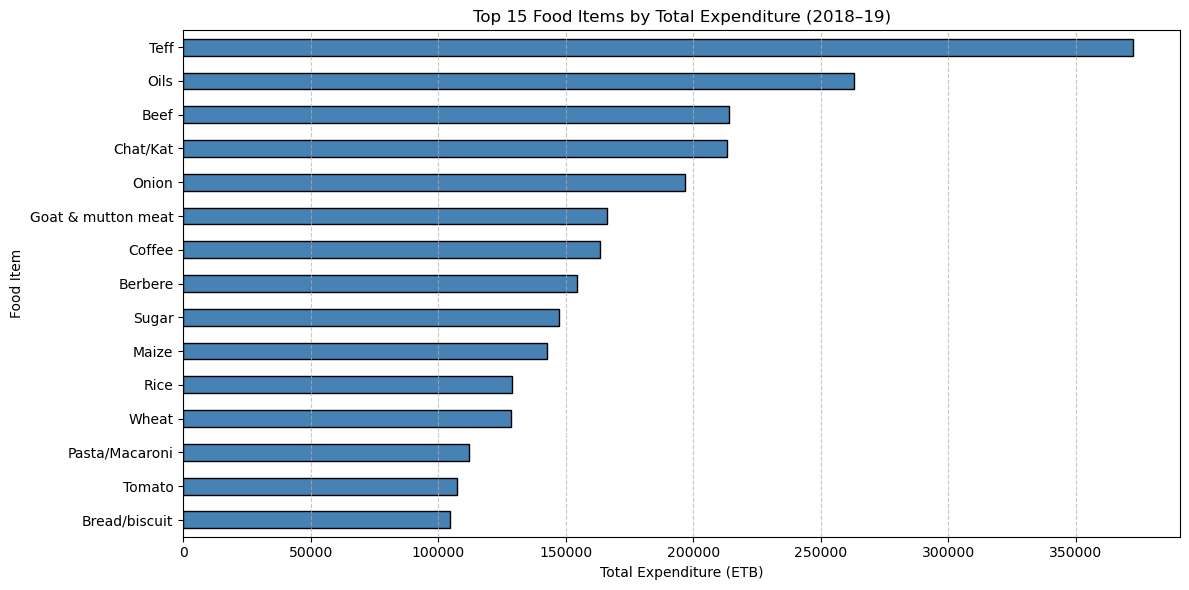

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

exp_df = pd.read_csv("Ethiopia_2 - Food Expenditures (2018-19) (1).csv")

top_foods_total = exp_df.groupby('j')['Expenditure'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
top_foods_total.sort_values().plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Total Expenditure (ETB)')
plt.ylabel('Food Item')
plt.title('Top 15 Food Items by Total Expenditure (2018–19)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

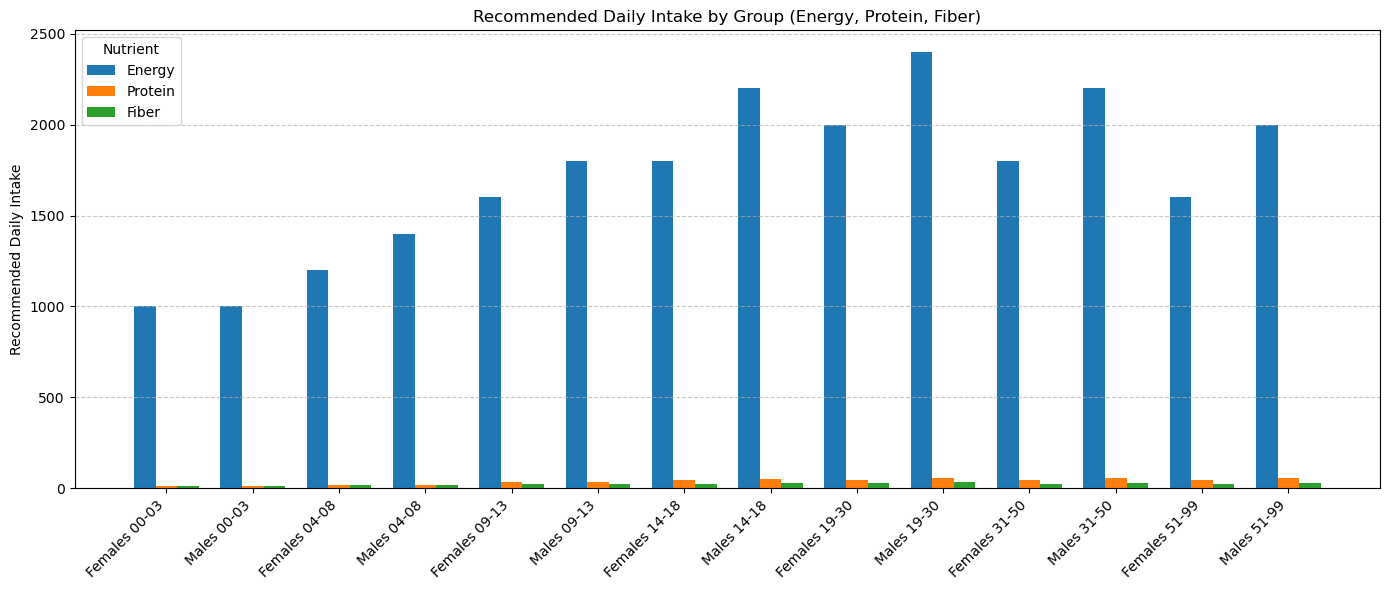

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


rdi_df = pd.read_csv("Ethiopia_2 - RDI.csv")
selected_nutrients = ['Energy', 'Protein', 'Fiber']
nutrient_df = rdi_df[rdi_df['n'].isin(selected_nutrients)]
nutrient_melted = nutrient_df.melt(id_vars='n', var_name='Group', value_name='RDI')
plt.figure(figsize=(14, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
width = 0.25
groups = nutrient_melted['Group'].unique()
x = range(len(groups))

for idx, nutrient in enumerate(selected_nutrients):
    subset = nutrient_melted[nutrient_melted['n'] == nutrient]
    plt.bar(
        [i + width * idx for i in x],
        subset['RDI'],
        width=width,
        label=nutrient,
        color=colors[idx]
    )
plt.xticks([i + width for i in x], groups, rotation=45, ha='right')
plt.ylabel('Recommended Daily Intake')
plt.title('Recommended Daily Intake by Group (Energy, Protein, Fiber)')
plt.legend(title='Nutrient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd

exp_df = pd.read_csv("Ethiopia_2 - Food Expenditures (2018-19) (1).csv")
price_df = pd.read_csv("Ethiopia_2 - Food Prices (2018-19).csv")

merged_df = pd.merge(
    exp_df,
    price_df[['t', 'm', 'j', 'Price']],
    how='left',
    on=['t', 'm', 'j']
)

merged_df = merged_df.dropna(subset=['Price'])

merged_df['Quantity'] = merged_df['Expenditure'] / merged_df['Price']

print(merged_df.head())

                    i        t       m       j  Expenditure       Price  \
0  010101088800910007  2018-19  Tigray  Coffee         30.0  121.145419   
1  010101088800910007  2018-19  Tigray   Onion          9.0   24.881432   
2  010101088800910007  2018-19  Tigray    Salt          3.0   27.779050   
3  010101088800910007  2018-19  Tigray   Shiro         12.0   55.816446   
4  010101088800910007  2018-19  Tigray   Sugar         12.0   52.459914   

   Quantity  
0  0.247636  
1  0.361716  
2  0.107995  
3  0.214990  
4  0.228746  


In [32]:
household_total_exp = merged_df.groupby('i')['Expenditure'].sum().reset_index()
household_total_exp = household_total_exp.rename(columns={'Expenditure': 'Total_Expenditure'})

median_exp = household_total_exp['Total_Expenditure'].median()

household_total_exp['Group'] = household_total_exp['Total_Expenditure'].apply(
    lambda x: 'Bottom 50%' if x <= median_exp else 'Top 50%'
)

merged_df = merged_df.merge(household_total_exp[['i', 'Group']], on='i', how='left')

print(merged_df[['i', 'j', 'Expenditure', 'Price', 'Quantity', 'Group']].head())

                    i       j  Expenditure       Price  Quantity       Group
0  010101088800910007  Coffee         30.0  121.145419  0.247636  Bottom 50%
1  010101088800910007   Onion          9.0   24.881432  0.361716  Bottom 50%
2  010101088800910007    Salt          3.0   27.779050  0.107995  Bottom 50%
3  010101088800910007   Shiro         12.0   55.816446  0.214990  Bottom 50%
4  010101088800910007   Sugar         12.0   52.459914  0.228746  Bottom 50%


/tmp/ipykernel_72/797385989.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity_Bin'] = pd.cut(df['Quantity'], bins=quantity_bins, include_lowest=True)
/tmp/ipykernel_72/797385989.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Quantity_Bin').agg({'Quantity': 'mean', 'Price': 'mean'}).dropna()
/tmp/ipykernel_72/797385989.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

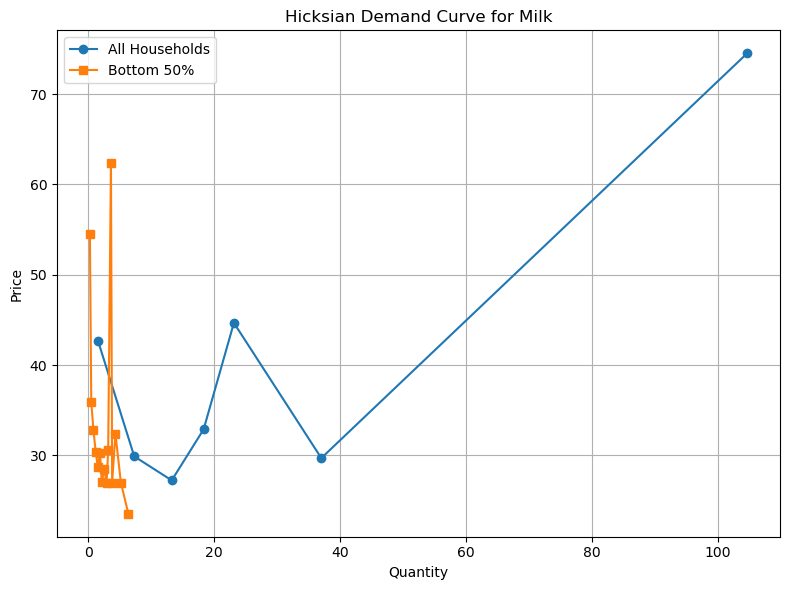

In [34]:
import matplotlib.pyplot as plt
import numpy as np

food_item = 'Milk'
filtered_df = merged_df[merged_df['j'] == food_item]

bottom50 = filtered_df[filtered_df['Group'] == 'Bottom 50%']
allhouseholds = filtered_df 

def prepare_curve(df, bins=20):
    df = df[df['Quantity'] > 0] 
    quantity_bins = np.linspace(df['Quantity'].min(), df['Quantity'].max(), bins)
    df['Quantity_Bin'] = pd.cut(df['Quantity'], bins=quantity_bins, include_lowest=True)
    grouped = df.groupby('Quantity_Bin').agg({'Quantity': 'mean', 'Price': 'mean'}).dropna()
    return grouped

bottom50_curve = prepare_curve(bottom50)
all_curve = prepare_curve(allhouseholds)

plt.figure(figsize=(8, 6))
plt.plot(all_curve['Quantity'], all_curve['Price'], label='All Households', marker='o')
plt.plot(bottom50_curve['Quantity'], bottom50_curve['Price'], label='Bottom 50%', marker='s')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title(f'Hicksian Demand Curve for {food_item}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
merged_df

,i,t,m,j,Expenditure,Price,Quantity,Group
0,010101088800910007,2018-19,Tigray,Coffee,30.0,121.145419,0.247636,Bottom 50%
1,010101088800910007,2018-19,Tigray,Onion,9.0,24.881432,0.361716,Bottom 50%
2,010101088800910007,2018-19,Tigray,Salt,3.0,27.779050,0.107995,Bottom 50%
3,010101088800910007,2018-19,Tigray,Shiro,12.0,55.816446,0.214990,Bottom 50%
4,010101088800910007,2018-19,Tigray,Sugar,12.0,52.459914,0.228746,Bottom 50%
...,...,...,...,...,...,...,...,...
84916,150101088803701087,2018-19,Dire Dawa,Oils,25.0,48.412459,0.516396,Bottom 50%
84917,150101088803701087,2018-19,Dire Dawa,Potato,15.0,20.997981,0.714354,Bottom 50%
84918,150101088803701087,2018-19,Dire Dawa,Salt,10.0,25.141041,0.397756,Bottom 50%
84919,150101088803701097,2018-19,Dire Dawa,Fenugreek,17.0,56.388634,0.301479,Bottom 50%
